In [1]:
import pandas as pd
import numpy as np

In [2]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


In [3]:
train_data = pd.read_csv("train_V2.csv")
train_data = reduce_mem_usage(train_data)

Memory usage of dataframe is 983.90 MB
Memory usage after optimization is: 498.81 MB
Decreased by 49.3%


In [4]:
test_data = pd.read_csv("test_V2.csv")
test_data = reduce_mem_usage(test_data)

Memory usage of dataframe is 413.18 MB
Memory usage after optimization is: 225.31 MB
Decreased by 45.5%


In [5]:
train_data.shape

(4446966, 29)

In [6]:
test_data.shape

(1934174, 28)

In [7]:
train_data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00000,0,0,0,60,...,0,0.000000,0,0.000000,0,0,244.75,1,1466,0.444336
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.50000,0,0,0,57,...,0,0.004501,0,11.039062,0,0,1434.00,5,0,0.640137
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00000,0,0,0,47,...,0,0.000000,0,0.000000,0,0,161.75,2,0,0.775391
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90625,0,0,0,75,...,0,0.000000,0,0.000000,0,0,202.75,3,0,0.166748
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00000,0,0,0,45,...,0,0.000000,0,0.000000,0,0,49.75,2,0,0.187500


In [8]:
test_data.head(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46875,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.12500,0,0,2,11,...,1503,2,4668.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40625,0,0,4,49,...,1565,0,0.0,0,0.0,0,0,788.0,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.50000,0,0,0,54,...,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.25000,1,2,1,7,...,1480,1,0.0,0,0.0,0,0,2964.0,4,0


In [9]:
train_data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4446966.00,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4446966.0,4.446966e+06,4.446966e+06,4446966.000,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,NaN,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,NaN,3.496091e-03,NaN,2.386841e-02,7.918208e-03,NaN,3.660488e+00,6.064601e+02,NaN
std,5.885731e-01,1.715794e+00,NaN,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,NaN,7.337297e-02,NaN,1.673935e-01,9.261157e-02,NaN,2.456544e+00,7.397004e+02,0.000000e+00
min,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,155.125,2.000000e+00,0.000000e+00,1.999512e-01
50%,0.000000e+00,0.000000e+00,84.25,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,685.500,3.000000e+00,0.000000e+00,4.582520e-01
75%,0.000000e+00,2.000000e+00,186.00,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.910095e-01,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1976.000,5.000000e+00,1.495000e+03,7.407227e-01
max,2.200000e+01,3.300000e+01,6616.00,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.070400e+04,1.800000e+01,3824.0,1.200000e+01,5.000000e+00,25776.000,2.360000e+02,2.013000e+03,1.000000e+00


In [10]:
train_data.dtypes

Id                 category
groupId            category
matchId            category
assists                int8
boosts                 int8
damageDealt         float16
DBNOs                  int8
headshotKills          int8
heals                  int8
killPlace              int8
killPoints            int16
kills                  int8
killStreaks            int8
longestKill         float16
matchDuration         int16
matchType          category
maxPlace               int8
numGroups              int8
rankPoints            int16
revives                int8
rideDistance        float16
roadKills              int8
swimDistance        float16
teamKills              int8
vehicleDestroys        int8
walkDistance        float16
weaponsAcquired       int16
winPoints             int16
winPlacePerc        float16
dtype: object

In [11]:
train_data.isna().any()

Id                 False
groupId            False
matchId            False
assists            False
boosts             False
damageDealt        False
DBNOs              False
headshotKills      False
heals              False
killPlace          False
killPoints         False
kills              False
killStreaks        False
longestKill        False
matchDuration      False
matchType          False
maxPlace           False
numGroups          False
rankPoints         False
revives            False
rideDistance       False
roadKills          False
swimDistance       False
teamKills          False
vehicleDestroys    False
walkDistance       False
weaponsAcquired    False
winPoints          False
winPlacePerc        True
dtype: bool

In [12]:
train_data['Id'].nunique()

4446966

In [13]:
train_data['groupId'].nunique()

2026745

In [14]:
train_data['matchId'].nunique()

47965

In [15]:
#Match Type : There are 3 Game Modes in the Game - Solo,Duo,Squad

In [16]:
train_data["matchType"]

0          squad-fpp
1          squad-fpp
2                duo
3          squad-fpp
4           solo-fpp
             ...    
4446961    squad-fpp
4446962         solo
4446963    squad-fpp
4446964    squad-fpp
4446965     solo-fpp
Name: matchType, Length: 4446966, dtype: category
Categories (16, object): [crashfpp, crashtpp, duo, duo-fpp, ..., solo, solo-fpp, squad, squad-fpp]

In [17]:
train_data.groupby(["matchType"]).count()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
matchType,,,,,,,,,,,,,,,,,,,,,
crashfpp,6287,6287,6287,6287,6287,6287,6287,6287,6287,6287,...,6287,6287,6287,6287,6287,6287,6287,6287,6287,6287
crashtpp,371,371,371,371,371,371,371,371,371,371,...,371,371,371,371,371,371,371,371,371,371
duo,313591,313591,313591,313591,313591,313591,313591,313591,313591,313591,...,313591,313591,313591,313591,313591,313591,313591,313591,313591,313591
duo-fpp,996691,996691,996691,996691,996691,996691,996691,996691,996691,996691,...,996691,996691,996691,996691,996691,996691,996691,996691,996691,996691
flarefpp,718,718,718,718,718,718,718,718,718,718,...,718,718,718,718,718,718,718,718,718,718
flaretpp,2505,2505,2505,2505,2505,2505,2505,2505,2505,2505,...,2505,2505,2505,2505,2505,2505,2505,2505,2505,2505
normal-duo,199,199,199,199,199,199,199,199,199,199,...,199,199,199,199,199,199,199,199,199,199
normal-duo-fpp,5489,5489,5489,5489,5489,5489,5489,5489,5489,5489,...,5489,5489,5489,5489,5489,5489,5489,5489,5489,5489
normal-solo,326,326,326,326,326,326,326,326,326,326,...,326,326,326,326,326,326,326,326,326,326


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

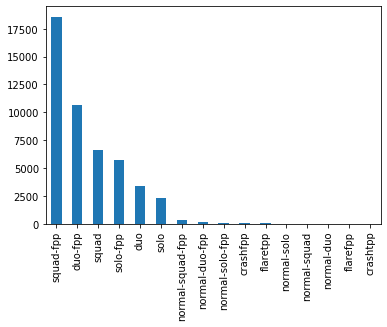

In [19]:
train_data.groupby('matchId')['matchType'].first().value_counts().plot.bar()

In [20]:
#Mapping

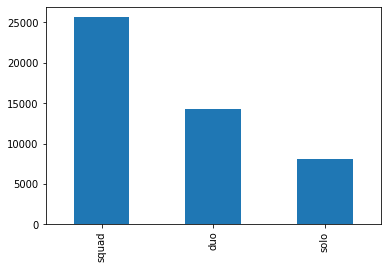

In [21]:
new_train_data = train_data
def mapthematch(data):
    mapping = lambda y:'solo' if ('solo' in y) else 'duo' if ('duo' in y) or ('crash' in y) else 'squad'
    data['matchType'] = data['matchType'].apply(mapping)
    return(new_train_data)
data = mapthematch(new_train_data)

data.groupby('matchId')['matchType'].first().value_counts().plot.bar()

In [22]:
#Finding a cheating match

In [23]:
data[data['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [24]:
data.drop(2744604,inplace = True)
data[data['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


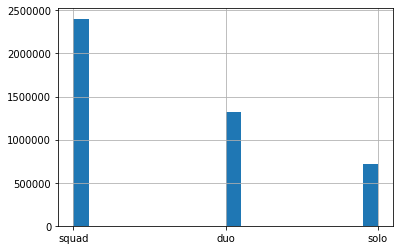

In [25]:
data['matchType'].hist(bins=20)

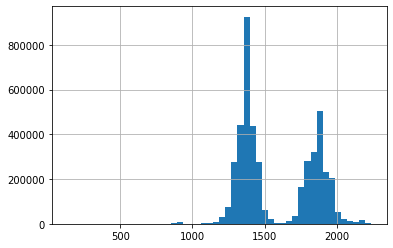

In [26]:
data['matchDuration'].hist(bins=50)

In [27]:
#Minimum Match Duration

data['matchDuration'].min()

133

In [28]:
#Maximum Match Duration

data['matchDuration'].max()

2237

In [29]:
#Normalizing the data

#Normalizing the Kills Column

data['killsNormalization'] = data['kills']*((100-data['kills'])/100 +1)

In [30]:
#Normalizing the Damage Dealt Column

data['damageDealtNormalization'] = data['damageDealt']*((100-data['damageDealt'])/100+1)

In [31]:
#Normalizing the MAX Place column

data['maxPlaceNormalization'] = data['maxPlace']*((100-data['maxPlace'])/100+1)

In [32]:
#Normalizing the Match Duration Column

data['matchDurationNormalization'] = data['matchDuration']*((100-data['matchDuration'])/100+1)

<h3> Normalized Data</h3>

In [33]:
new_normalized_column = data[['Id','matchDuration','matchDurationNormalization','maxPlace','maxPlaceNormalization','kills','killsNormalization','damageDealt','damageDealtNormalization']]

In [34]:
new_normalized_column

,Id,matchDuration,matchDurationNormalization,maxPlace,maxPlaceNormalization,kills,killsNormalization,damageDealt,damageDealtNormalization
0,7f96b2f878858a,1306,-14444.36,28,48.16,0,0.00,0.00000,0.00000
1,eef90569b9d03c,1777,-28023.29,26,45.24,0,0.00,91.50000,99.25000
2,1eaf90ac73de72,1318,-14735.24,50,75.00,0,0.00,68.00000,89.75000
3,4616d365dd2853,1436,-17748.96,31,52.39,0,0.00,32.90625,55.00000
4,315c96c26c9aac,1424,-17429.76,97,99.91,1,1.99,100.00000,100.00000
...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,1873,-31335.29,29,49.59,0,0.00,0.00000,0.00000
4446962,f4197cf374e6c0,1435,-17722.25,93,99.51,0,0.00,44.15625,68.81250
4446963,e1948b1295c88a,1321,-14808.41,28,48.16,0,0.00,59.06250,83.25000
4446964,cc032cdd73b7ac,1373,-16105.29,26,45.24,2,3.96,180.37500,35.40625


In [35]:
#Total Distance Travelled

data['totalDistancetravelled'] = data['rideDistance'] + data['walkDistance'] + data['swimDistance']
data['totalDistancetravelled']

0           244.7500
1          1445.0000
2           161.7500
3           202.7500
4            49.7500
             ...    
4446961    2312.0000
4446962      81.6875
4446963     790.5000
4446964    2748.0000
4446965    2612.0000
Name: totalDistancetravelled, Length: 4446965, dtype: float16

In [36]:
# Head Shot Feature

data['headshot_rate'] = data['headshotKills']/data['kills']
data['headshot_rate']

0          NaN
1          NaN
2          NaN
3          NaN
4          0.0
          ... 
4446961    NaN
4446962    NaN
4446963    NaN
4446964    0.5
4446965    0.0
Name: headshot_rate, Length: 4446965, dtype: float64

In [37]:
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,walkDistance,weaponsAcquired,winPoints,winPlacePerc,killsNormalization,damageDealtNormalization,maxPlaceNormalization,matchDurationNormalization,totalDistancetravelled,headshot_rate
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00000,0,0,0,60,...,244.7500,1,1466,0.444336,0.00,0.00000,48.16,-14444.36,244.7500,NaN
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.50000,0,0,0,57,...,1434.0000,5,0,0.640137,0.00,99.25000,45.24,-28023.29,1445.0000,NaN
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00000,0,0,0,47,...,161.7500,2,0,0.775391,0.00,89.75000,75.00,-14735.24,161.7500,NaN
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90625,0,0,0,75,...,202.7500,3,0,0.166748,0.00,55.00000,52.39,-17748.96,202.7500,NaN
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00000,0,0,0,45,...,49.7500,2,0,0.187500,1.99,100.00000,99.91,-17429.76,49.7500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00000,0,0,0,74,...,1019.0000,3,1507,0.178589,0.00,0.00000,49.59,-31335.29,2312.0000,NaN
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15625,0,0,0,69,...,81.6875,6,0,0.293457,0.00,68.81250,99.51,-17722.25,81.6875,NaN
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06250,0,0,0,66,...,788.5000,4,0,0.481445,0.00,83.25000,48.16,-14808.41,790.5000,NaN
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.37500,1,1,2,11,...,2748.0000,8,0,0.799805,3.96,35.40625,45.24,-16105.29,2748.0000,0.5


In [38]:
data['killswithoutMovinganytime'] = ((data['kills'] >0) & (data['totalDistancetravelled']==0))
data['killswithoutMovinganytime']

0          False
1          False
2          False
3          False
4          False
           ...  
4446961    False
4446962    False
4446963    False
4446964    False
4446965    False
Name: killswithoutMovinganytime, Length: 4446965, dtype: bool

In [39]:
data[data['killswithoutMovinganytime']==True].shape

(1535, 36)

In [40]:
data[data['killswithoutMovinganytime']==True].head(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,weaponsAcquired,winPoints,winPlacePerc,killsNormalization,damageDealtNormalization,maxPlaceNormalization,matchDurationNormalization,totalDistancetravelled,headshot_rate,killswithoutMovinganytime
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.00,0,0,3,18,...,8,0,0.856934,11.64,-2330.000,27.75,-2330.49,0.0,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.50,0,0,6,33,...,22,0,0.600098,5.91,-507.500,20.79,-28596.36,0.0,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.00,0,4,5,3,...,13,0,0.894531,36.00,-27120.000,36.00,-6268.04,0.0,0.2,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.75,0,0,0,69,...,7,1500,0.000000,1.99,66.625,34.39,-4786.01,0.0,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.00,0,1,0,37,...,10,0,0.300049,1.99,100.000,20.79,-28596.36,0.0,1.0,True


In [41]:
#Remove Outliers
data.drop(data[data['killswithoutMovinganytime']==True].index,inplace=True)

In [42]:
#Visualizing Longest Kill and try to find out what are the Outlier we have

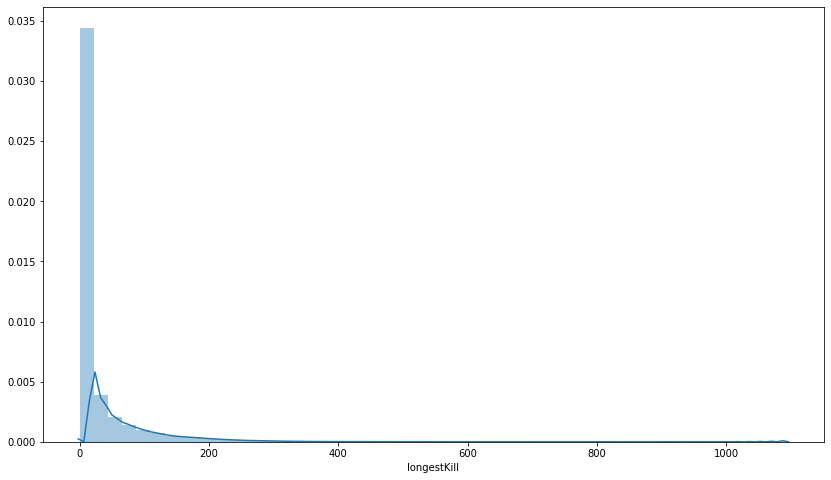

In [43]:
import seaborn as sn

plt.figure(figsize=(14,8))
sn.distplot(data['longestKill'])
plt.show()

In [44]:
display(data[data['longestKill']>= 900].shape)
data[data['longestKill']>= 900].head(10)

(140, 36)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,weaponsAcquired,winPoints,winPlacePerc,killsNormalization,damageDealtNormalization,maxPlaceNormalization,matchDurationNormalization,totalDistancetravelled,headshot_rate,killswithoutMovinganytime
49933,8d84a760b76634,dcbeb664940a34,ecf0c4f12fbd6a,0,4,1550.000,14,10,2,1,...,4,0,0.714355,29.44,-20928.000000,49.59,-30002.25,8560.00000,0.625000,False
144856,0d65331cbe09bf,f50d852ff41035,6575f2a4ef9fd4,5,0,869.500,0,3,0,8,...,16,0,0.750000,19.00,-5820.000000,9.75,-2350.25,241.25000,0.300000,False
156541,dd0a5d30e785c0,4cb8d3787b8150,a211eaf999b492,2,0,1119.000,0,2,1,11,...,31,1500,0.500000,20.79,-10280.000000,37.59,-6268.04,27.34375,0.181818,False
180680,14eda1bf0c65f8,ad03385288412a,6b9acd66007d2a,2,5,121.625,0,0,1,25,...,7,0,0.893555,1.99,95.312500,72.96,-34310.25,3500.00000,0.000000,False
195021,f141f7e776138b,a0fa42bf37e9f0,0b4c9543bc9199,1,4,784.000,5,4,5,4,...,5,1523,0.848633,7.84,-4580.000000,56.44,-43581.00,9928.00000,1.000000,False
202281,88e2af7d78af5a,34ddeede52c042,4346bc63bc67fa,0,3,784.000,5,1,1,5,...,9,0,0.923340,7.84,-4580.000000,46.71,-31016.96,3776.00000,0.250000,False
240005,41c2f5c0699807,9faecf87ab4275,634edab75860b3,5,0,1284.000,8,5,7,18,...,38,1500,0.538574,20.79,-13920.000000,26.04,-14492.64,48.87500,0.454545,False
258691,07abc29de0131f,e2ac5122c2fa7f,2fe1c4f578dff8,0,0,1129.000,11,4,0,2,...,6,1559,0.500000,15.36,-10488.000000,46.71,-29209.44,4104.00000,0.500000,False
266808,ef443d5ad56ccb,f84b7639c369c7,9c8962b58bb3e3,3,0,505.000,0,2,0,30,...,18,1500,1.000000,9.75,-1541.000000,15.36,-2213.61,811.00000,0.400000,False
295024,1742cbb66a737a,bd2a5eed44ae6f,baebef42b688a3,0,0,188.625,1,0,0,19,...,1,0,0.458252,3.96,21.453125,43.75,-31512.84,947.00000,0.000000,False


In [45]:
#Removing Outliers
data.drop(data[data['longestKill']>= 900].index,inplace=True)

In [46]:
data.shape

(4445290, 36)

In [47]:
data['winPlacePerc']

0          0.444336
1          0.640137
2          0.775391
3          0.166748
4          0.187500
             ...   
4446961    0.178589
4446962    0.293457
4446963    0.481445
4446964    0.799805
4446965    0.546387
Name: winPlacePerc, Length: 4445290, dtype: float16

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [49]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'killsNormalization',
       'damageDealtNormalization', 'maxPlaceNormalization',
       'matchDurationNormalization', 'totalDistancetravelled', 'headshot_rate',
       'killswithoutMovinganytime'],
      dtype='object')

In [50]:
#thought of using damageDealtNormalization but it seems like it contains null values, So working these features
x = data[['killsNormalization','maxPlaceNormalization','matchDurationNormalization','totalDistancetravelled']]
y = data['winPlacePerc']

In [51]:
train_X , test_X , train_y , test_y = train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
model = LinearRegression()
model.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
model.score(test_X,test_y)

0.5726480995326063

In [54]:
predicted_vals = model.predict(test_X)

In [55]:
predicted_vals

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error
mae(predicted_vals,test_y)

0.16110395157550306

In [56]:
from sklearn.neighbors import KNeighborsRegressor

In [57]:
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(train_X,train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [58]:
neigh.score(test_X,test_y)

0.7093726420198672

In [59]:
pred_vals = neigh.predict(test_X)

In [60]:
mae(pred_vals,test_y)

0.1218